# Kode Sound Embedding

# KELOMPOK 7

ANGGOTA :

Nadila Fitri Noviardhana		164221006

Viky Dwi Thaniya			164221030	

Mochammad Fahd Ali Hillaby	164221067

Nisrina Khairunnisa			164221097


Dataset https://drive.google.com/drive/folders/1HDbtOL08jSaAad2-eHHXslyPWavzIjbL?usp=drive_link 

# Building Model

WARNING! rerun bagian ini bikin modelnya berubah lagi

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential, load_model
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.callbacks import ModelCheckpoint  # Import ModelCheckpoint

# # Load the data
# data = pd.read_csv("audio_embeddings_mfcc128.csv")

# # Map string labels only for training purposes but retain their original format elsewhere
# label_mapping = {label: idx for idx, label in enumerate(data["label"].unique())}
# data["numeric_label"] = data["label"].map(label_mapping)

# # Prepare features (X) and labels (y) - ensure MFCCs are reshaped for LSTM input
# X = data.drop(columns=["label", "numeric_label"]).values
# y = data["numeric_label"].values

# # Reshape X for LSTM (samples, timesteps, features)
# X = X.reshape(X.shape[0], 1, X.shape[1])

# # Split data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # LSTM Model definition
# model = Sequential([
#     LSTM(128, input_shape=(X.shape[1], X.shape[2]), return_sequences=False),
#     Dense(64, activation="relu"),
#     Dense(len(label_mapping), activation="softmax")  # Multiclass classification for all unique labels
# ])

# # Compile the model
# model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# # Define the ModelCheckpoint callback
# checkpoint_callback = ModelCheckpoint(
#     'best_lstm_model.h5',
#     monitor='val_loss',
#     save_best_only=True,
#     mode='min',
#     verbose=1
# )

# # Train with epochs and ModelCheckpoint
# history = model.fit(
#     X_train,
#     y_train,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=32,
#     callbacks=[checkpoint_callback]
# )


# Evaluasi Model

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint  

best_model = load_model('best_lstm_model.h5')

data = pd.read_csv("audio_embeddings_mfcc128.csv")
label_mapping = {label: idx for idx, label in enumerate(data["label"].unique())}
data["numeric_label"] = data["label"].map(label_mapping)

reverse_label_mapping = {v: k for k, v in label_mapping.items()}

X = data.drop(columns=["label", "numeric_label"]).values
y = data["numeric_label"].values

X = X.reshape(X.shape[0], 1, X.shape[1])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

predictions = best_model.predict(X_test)

predicted_classes = np.argmax(predictions, axis=1)

accuracy = np.mean(predicted_classes == y_test)
print(f"Test Accuracy (manual calculation): {accuracy * 100:.2f}%")

predicted_labels = [reverse_label_mapping[class_idx] for class_idx in predicted_classes]
confidence_scores = np.max(predictions, axis=1)

report = classification_report(y_test, predicted_classes, target_names=list(reverse_label_mapping.values()))
print("\nClassification Report (Precision, Recall, F1-Score):")
print(report)

class_accuracies = {}
for class_idx in range(len(label_mapping)):
    class_samples = np.where(y_test == class_idx)[0]
    class_predictions = predicted_classes[class_samples]
    class_accuracy = np.mean(class_predictions == class_idx)
    class_accuracies[reverse_label_mapping[class_idx]] = class_accuracy * 100

print("\nClass-wise Accuracy:")
for label, accuracy in class_accuracies.items():
    print(f"{label}: {accuracy:.2f}%")

print("\nPredictions and Confidence Scores:")
for idx in range(len(predicted_labels)):
    print(f"Sample {idx+1}: Predicted Label: {predicted_labels[idx]}, Confidence Score: {confidence_scores[idx]:.4f}")



14/14 [==============================] - 2s 4ms/step - loss: 0.1156 - accuracy: 0.9643
Test Loss: 0.1156
Test Accuracy: 96.43%
14/14 [==============================] - 2s 4ms/step
Test Accuracy (manual calculation): 96.43%

Classification Report (Precision, Recall, F1-Score):
                 precision    recall  f1-score   support

      Accordion       1.00      0.94      0.97        17
Acoustic_Guitar       0.92      0.92      0.92        12
          Banjo       1.00      1.00      1.00        16
    Bass_Guitar       1.00      1.00      1.00        12
       Clarinet       1.00      1.00      1.00        22
        cowbell       1.00      1.00      1.00        13
        Cymbals       1.00      0.81      0.89        21
          Dobro       0.94      1.00      0.97        16
       Drum_set       1.00      1.00      1.00        13
 Electro_Guitar       1.00      0.91      0.95        11
      Floor_Tom       0.83      0.95      0.88        20
          flute       1.00      1.00  

# Summary Model

In [ ]:
model = load_model('best_lstm_model.h5')  

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 128)               131584    
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 28)                1820      
                                                                 
Total params: 141660 (553.36 KB)
Trainable params: 141660 (553.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Visualisasi Prediksi

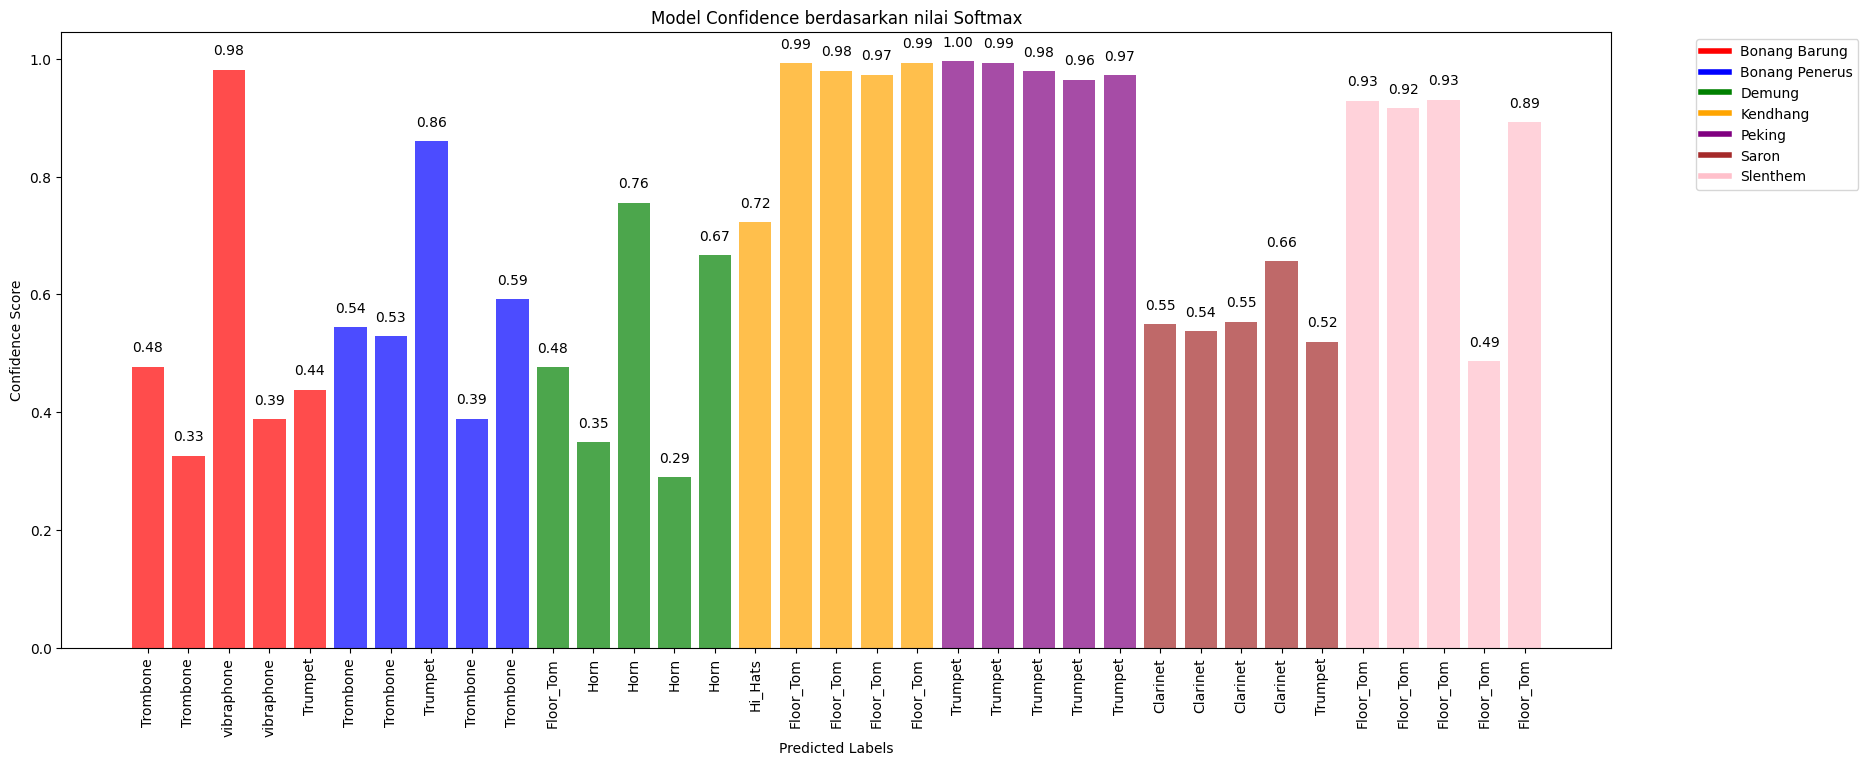

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

model = load_model('best_lstm_model.h5')  

new_data = pd.read_csv("gamelan_mfcc128.csv")

X_new = new_data.drop(columns=["label"]).iloc[0:].values  
X_new = X_new[:, :128]  
X_new = X_new.reshape(X_new.shape[0], 1, 128)  

predictions = model.predict(X_new, verbose=0)  
predicted_classes = np.argmax(predictions, axis=1)  
confidence_scores = np.max(predictions, axis=1)  

training_data = pd.read_csv("audio_embeddings_mfcc128.csv")
label_mapping = {label: idx for idx, label in enumerate(training_data["label"].unique())}

predicted_labels = [
    [label for label, idx in label_mapping.items() if idx == predicted_class][0]
    for predicted_class in predicted_classes
]

unknown_count = predicted_labels.count("Unknown")

color_map = {
    "Bonang Barung": 'red',
    "Bonang Penerus": 'blue',
    "Demung": 'green',
    "Kendhang": 'orange',
    "Peking": 'purple',
    "Saron": 'brown',
    "Slenthem": 'pink',
}

bar_colors = []
groups = [
    "Bonang Barung", "Bonang Penerus", "Demung", "Kendhang", "Peking",
    "Saron", "Slenthem"
]

for i, label in enumerate(predicted_labels):
    group_idx = i // 5  
    if group_idx < len(groups):
        bar_colors.append(color_map[groups[group_idx]])
    else:
        bar_colors.append('gray') 

plt.figure(figsize=(20, 8))
bars = plt.bar(range(len(predicted_labels)), confidence_scores, color=bar_colors, alpha=0.7)

plt.xticks(
    ticks=range(len(predicted_labels)),
    labels=predicted_labels,
    rotation=90
)

handles = [plt.Line2D([0], [0], color=color, lw=4) for color in color_map.values()]
plt.legend(handles=handles, labels=color_map.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Predicted Labels")
plt.ylabel("Confidence Score")
plt.title("Model Confidence berdasarkan nilai Softmax")

for bar, score in zip(bars, confidence_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{score:.2f}', ha='center', va='bottom')

plt.show()

